# Приоритизация гипотез и анализ A/B-теста

**Постановка задачи**

Заказчик исследования - крупный интернет-магазин. Отделом аналитики был составлен список гипотез для увеличения выручки. Нам необходимо приоритизировать гипотезы, а затем провести анализ результатов A/B-теста.

**Описание данных**

hypothesis.csv
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

orders.csv
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

visitors.csv
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#График-кумулятивной-выручки" data-toc-modified-id="График-кумулятивной-выручки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>График кумулятивной выручки</a></span></li><li><span><a href="#График-кумулятивного-среднего-чека" data-toc-modified-id="График-кумулятивного-среднего-чека-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График кумулятивного среднего чека</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивного-среднего-количества-заказов" data-toc-modified-id="График-кумулятивного-среднего-количества-заказов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>График кумулятивного среднего количества заказов</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-количества-заказов" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-количества-заказов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего количества заказов</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#Точечный-график-стоимостей-заказов" data-toc-modified-id="Точечный-график-стоимостей-заказов-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Точечный график стоимостей заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-по-&quot;сырым&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-по-&quot;сырым&quot;-данным-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Статистическая значимость различий по "сырым" данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-по-&quot;отфильтрованным&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-по-&quot;отфильтрованным&quot;-данным-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Статистическая значимость различий по "отфильтрованным" данным</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
print('Библиотеки импортированы')

Библиотеки импортированы


In [2]:
register_matplotlib_converters()

## Приоритизация гипотез

### Получение данных

In [3]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Фреймворк ICE

In [5]:
hypothesis['ICE'] = (
    hypothesis['Impact'] *
    hypothesis['Confidence']
) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False).style.format({'ICE':'{:.3f}'})

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


При использовании фреймворка ICE наиболее перспективной является гипотеза с индексом 8: `Запустить акцию, дающую скидку на товар в день рождения`

### Фреймворк RICE

In [6]:
hypothesis['RICE'] = (
    hypothesis['Reach'] *
    hypothesis['Impact'] *
    hypothesis['Confidence']
) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False).style.format({'RICE':'{:.0f}'})

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Результаты изменились при использовании фреймворка RICE, так как гипотеза, связанная с днём рождения клиентов, затронет очень низкое количество клиентов. При использовании RICE на первое место вышла гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. 

Первой мы проверим именно эту гипотезу, для этого запустим A/B-тест и проанализируем его результаты.

## Анализ A/B-теста

### Получение данных

In [7]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# переведём дату в тип datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
display(orders['date'].min(), orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [10]:
# проверим, есть ли в данных дубликаты
orders.duplicated().sum()

0

Проверим по таблице заказов, есть ли пользователи, которые попали в обе группы A/B-теста.

In [11]:
double_group_users = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
double_group_users[double_group_users['group'] == 2]['visitorId'].count()

58

In [12]:
# проверим, сколько заказов сделали пользователи, попавшие в обе группы
orders[orders['visitorId'].isin(double_group_users[double_group_users['group'] == 2]['visitorId'])].shape[0]

181

У нас есть 58 пользователей, которые вошли и в группу A, и в группу B. Наличие таких пользователей говорит о том, что при подготовке и проведении A/B-теста были допущены ошибки. Всего такие пользователи совершили 181 заказ. Это может исказить результаты исследовния.

In [13]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
# переведём дату в тип datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
display(visitors['date'].min(), visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [16]:
# проверим, есть ли в данных дубликаты
visitors.duplicated().sum()

0

### График кумулятивной выручки

In [17]:
# создадим массив уникальных пар значений дат и групп
datesGroups = orders[['date', 'group']].drop_duplicates()

In [18]:
# cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(['date', 'group'])

# cоберём агрегированные кумулятивные по дням данные о визитах
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum',
        }
    ),
    axis=1,
).sort_values(['date', 'group'])

# объединим кумулятивные данные в единую таблицу
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [19]:
# убедимся, что датафрейм создан верно, проверим совпадение минимальной и максимальной даты с исходными данными
display(cumulativeData['date'].min() == orders['date'].min(), cumulativeData['date'].max() == orders['date'].max())

True

True

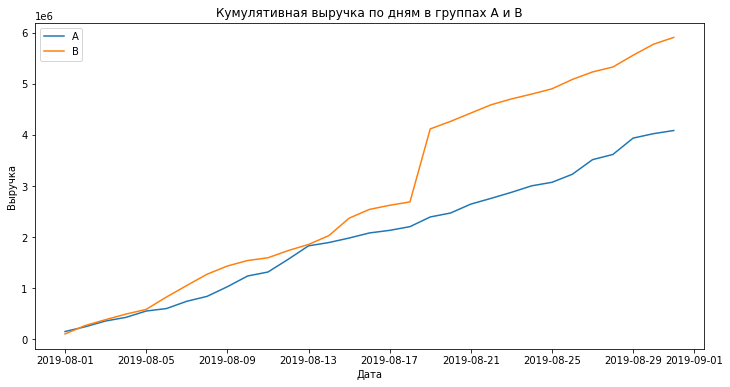

In [20]:
# датафрейм с кумулятивной выручкой и кумулятивным количеством заказов по дням для группы A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
# датафрейм с кумулятивной выручкой и кумулятивным количеством заказов по дням для группы B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах A и B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend() 
plt.show()

По графику мы видим, что выручка равномерно увеличивается в течение всего теста, это хороший знак, однако у группы B есть место, в котором выручка сильно выросла. Это может быть связано со всплеском числа заказов, либо о появлении дорогих заказов в выборке. В дальнейшем проанализируем дополнительно такие выбросы. 

### График кумулятивного среднего чека

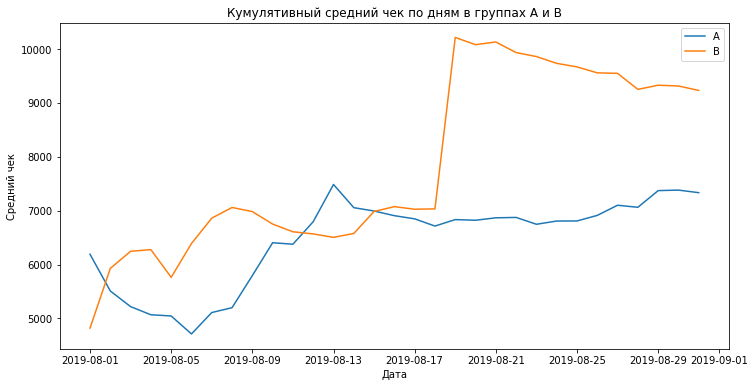

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах A и B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Начиная с середины теста средний чек установился для группы A. Для группы B в середине теста произошло сильное увеличение среднего чека, возможно, в выборку попали крупные заказы. В этом случае группе требуется больше данных, чтобы прийти к реальному среднему чеку и остановится на его уровне. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

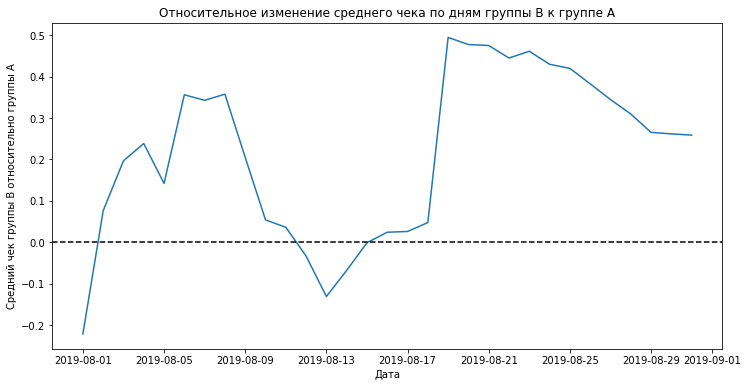

In [42]:
# соберём данные в едином датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)
# сроим график отношения средних чеков
plt.figure(figsize=(12, 6))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
    (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1    
)
plt.title('Относительное изменение среднего чека по дням группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

В некоторых точках различие кумулятивного среднего чека между группами сильно скачет, это свидетельствует о наличии крупных заказов и выбросах.

### График кумулятивного среднего количества заказов

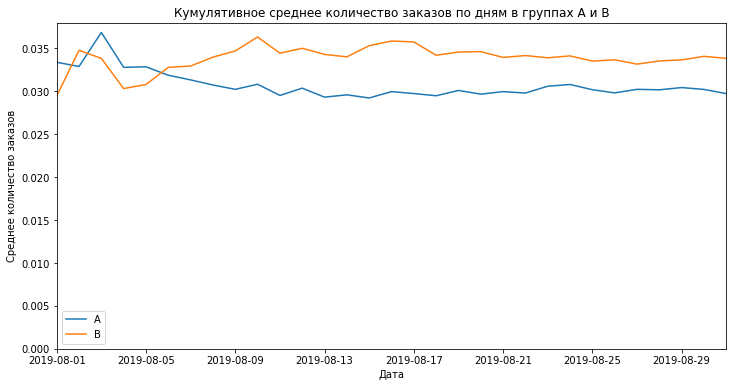

In [23]:
# добавим кумулятивное среднее количество заказов
cumulativeData['averageOrders'] = cumulativeData['orders'] / cumulativeData['visitors']
# разделим данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим график среднего количества заказов
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['averageOrders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['averageOrders'], label='B')
plt.title('Кумулятивное среднее количество заказов по дням в группах A и B')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дата')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.038])
plt.show()

Ещё в первой половине эксперимента среднее количество заказов обеих групп выровнялось. На пятый день теста среднее количество заказов группы B стало выше, чем среднее количество заказов группы A.

### График относительного изменения кумулятивного среднего количества заказов

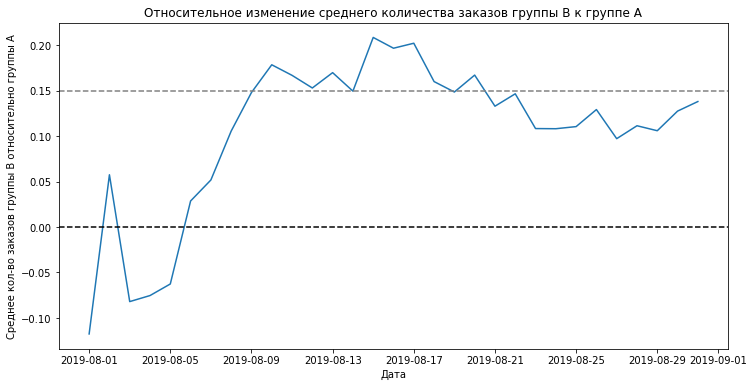

In [44]:
mergedCumulativeAverageOrders = cumulativeDataA[['date', 'averageOrders']].merge(
    cumulativeDataB[['date', 'averageOrders']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)
plt.figure(figsize=(12, 6))
plt.plot(
    mergedCumulativeAverageOrders['date'], 
    mergedCumulativeAverageOrders['averageOrdersB'] /
    mergedCumulativeAverageOrders['averageOrdersA'] - 1
)
plt.title('Относительное изменение среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

Среднее количество заказов группы B изначально было ниже среднего количества заказов группы A, затем вырвалось вперёд, опять остало, после чего было стабильно выше среднего количества заказов группы A. Возможно, ситуация изменится после обработки аномалий. 

### Точечный график количества заказов по пользователям

In [25]:
# посчитаем количество уникальных заказов на пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values('orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


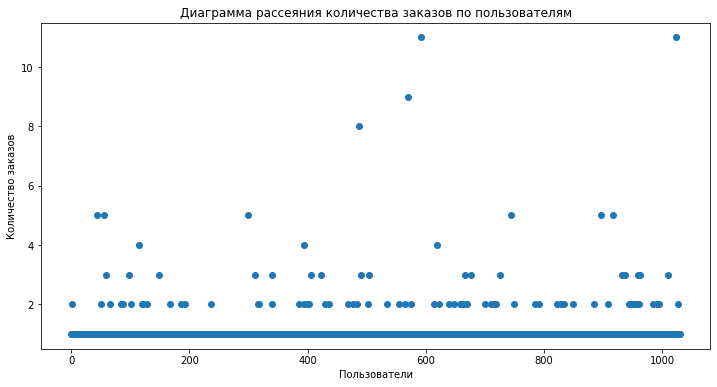

In [26]:
# построим точечную диаграмму количества заказов
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Диаграмма рассеяния количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

По графику мы видим, что большинство пользователей совершило один заказ, однако довольно много пользователей совершили от 2 до 5 заказов. Чтобы понять, что из этого считать аномалиями, посчитаем 95-ый и 99-ый перцентили.

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей сделали больше 2 заказов, и не более 1% сделали больше 4 заказов. Выберем 95-ый перцентиль в качестве верхней границы количества заказов.

### Точечный график стоимостей заказов

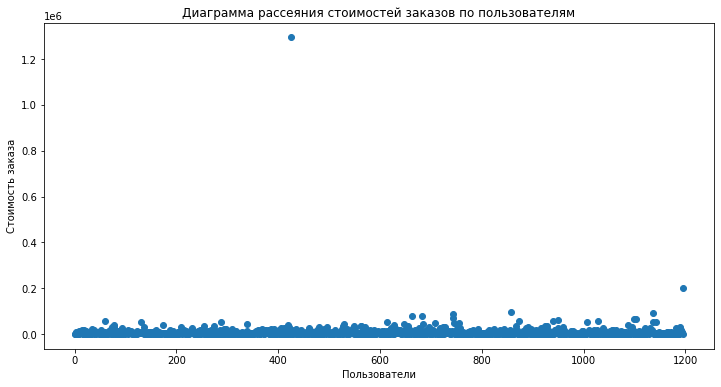

In [37]:
# построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Диаграмма рассеяния стоимостей заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

На графике мы видим явные выбросы. Ограничим график по оси Y, установив верхнюю границу в 100 тыс, чтобы рассмотреть основную часть заказов.

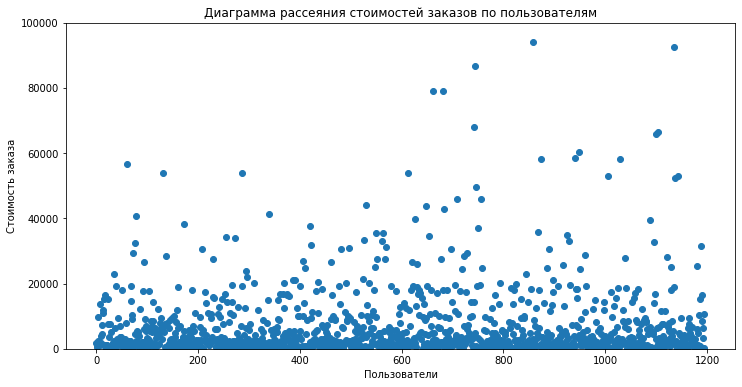

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylim((0, 100000))
plt.title('Диаграмма рассеяния стоимостей заказов по пользователям')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

Таким же образом посчитаем перцентили.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов имеют стоимость выше 28 тысяч рублей, и не более 1% имеют стоимость выше 58 тысяч рублей. Возьмём 95-ый перцентиль за вернюю границу стоимости заказов, остальные заказы будет правильно отсеясть как аномальные.

### Статистическая значимость различий по "сырым" данным

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами по "сырым" данным нет.
- Альтернативная: различия в среднем количестве заказов между группами по "сырым" данным есть.


- Нулевая: различий в среднем чеке заказов между группами по "сырым" данным нет.
- Альтернативная: различия в среднем чеке между группами по "сырым" данным есть.

Для проверки гипотез мы будем использовать **U-критерий Манна-Уитни**, это непараметрический тест, который хорошо подходит для независимых выборок небольшого размера. В качестве критического уровня статистической значимости выберем значение **0,05**.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.


In [31]:
# для пользователей, совершивших хотя бы 1 заказ, укажем количество заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],
    axis=0
)
sampleB = pd.concat(
    [ordersByUsersB['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],
    axis=0
)

# проверим выборки критерием Манна-Уитни
alpha = .05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value = {0:.3f}'.format(p_value))

if p_value > alpha:
    print('Нулевую гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу')
    
print('Относительное различие = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Отвергаем нулевую гипотезу
Относительное различие = 0.138


P-Value значительно меньше 0.05, поэтому нулевую теорию мы отвергаем. По данным анализа "сырых" данных мы можем сделать вывод о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы B к среднему количеству заказов группы A равен 13,8%.

Посчитаем статистическую значимость различия в среднем чеке заказов между группами.

In [32]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value = {0:.3f}'.format(p_value))

if p_value > alpha:
    print('Нулевую гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу')
    
print('Относительное различие = {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Нулевую гипотезу не отвергаем
Относительное различие = 0.259


P-Value значительно выше 0,05, значит, нет причин отвергать нулевую гипотезу и считать, что по "сырым" данным в среднем чеке между группами есть различия. Таким образом относительные различия в среднем чеке получены случайным образом.

### Статистическая значимость различий по "отфильтрованным" данным

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами по "отфильтрованным" данным нет.
- Альтернативная: различия в среднем количестве заказов между группами по "отфильтрованным" данным есть.


- Нулевая: различий в среднем чеке заказов между группами по "отфильтрованным" данным нет.
- Альтернативная: различия в среднем чеке между группами по "отфильтрованным" данным есть.

Для проверки гипотез снова используем **U-критерий Манна-Уитни**, критический уровень статистической значимости - **0,05**.

Для "фильтрации" данных найдём всех пользователей, которые совершили более 2 заказов, а также пользователей, которые совершили заказы дороже 28000 р.

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())
print('Количество аномальных пользователей:', abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Количество аномальных пользователей: 74


In [34]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],
    axis=0
)
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],
    axis=0
)

# проверим выборки критерием Манна-Уитни
alpha = .05
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value = {0:.3f}'.format(p_value))

if p_value > alpha:
    print('Нулевую гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу')
    
print('Относительное различие = {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value = 0.013
Отвергаем нулевую гипотезу
Относительное различие = 0.173


Результаты по среднему количеству заказов с учётом "отфильтрованных" данных практически не поменялись. Рассмотрим также средний чек.

In [35]:
p_value = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )]['revenue'], 
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )]['revenue'],
)[1]
print('p-value = {0:.3f}'.format(p_value))
if p_value > alpha:
    print('Нулевую гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу')
print('Относительное различие = {0:.3f}'.format(
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )]['revenue'].mean() / 
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )]['revenue'].mean()-1))

p-value = 0.738
Нулевую гипотезу не отвергаем
Относительное различие = -0.020


P-value увеличился в очищенных данных, это значит, что мы всё ещё не можем отвергнуть нулевую гипотезу, из чего мы делаем вывод, что статистически важных различий в среджнем чеке между группами нет. В "отфильтрованных" данных средний чек группы B стал слегка ниже группы A, на 2%.

## Вывод

Перед запуском A/B-теста нам нужно было выбрать наиболее перспективную гипотезу. Мы получили список из 8 гипотез, к которому применили фреймворки для приоритизации гипотез ICE и RICE. 

Так как фреймворк ICE не учитывает охват, что важно для наших гипотез, мы остановились на гипотезе, занявшей первое место по фреймворку RICE: "**Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**".

При анализе результатов A/B-теста мы сделали следующие выводы:
- кумулятивная выручка и кумулятивный средний чек с середины эксперимента стали выше у группы B;
- с пятого дня теста кумулятивное среднее количество заказов было выше у группы B;
- в группе B оказались пользователи, которые сделали крупные заказы, подняв тем самым средний чек своей группы, рекомендуется дополнительно изучить, почему это произошло.

При изучении данных мы обнаружили 74 аномальных пользователя, которые совершили более двух заказов за время теста, либо совершили заказы дороже 28000 рублей. 

При проведении статистического анализа результатов мы сделали следующие выводы:
- eсть статистически значимые различия в среднем количестве заказов пользователей между группой A и группой B как по "сырым", так и по "отфильтрованным" данным, группа B опережает группу А;
- нет статистически значимых различий в среднем чеке между группой A и группой B как по "сырым", так и по "отфильтрованным" данным.

Принимая во внимание вышеперечисленное, **тест рекомендуем остановить и зафиксировать победу группы B.**